<a href="https://colab.research.google.com/github/shayan823/reward_related_society/blob/main/FirstExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's start this project! 
Setting it up first and downloading  the data

In [ ]:
# install IBL pipeline package to access and navigate the pipeline
!pip install --quiet nma-ibl

import datajoint as dj

dj.config["database.host"] = "datajoint-public.internationalbrainlab.org"
dj.config["database.user"] = "ibl-public"
dj.config["database.password"] = "ibl-public" 

1. Meta data stored and imported from [**Alyx**](https://alyx.readthedocs.io/en/latest/):

    1) `ibl_reference`: general information about labs, users and projects  
    2) `ibl_subject`: information about the experiment subject including housing and genetics  
    3) `ibl_action`: information about performed surgeries
    4) `ibl_acquisition`: information about experimental sessions
    5) `ibl_data`: information pertaining to underlying data resource handling  
    
2. Behavioral data stored and imported from **FlatIron** data stores: `ibl_behavior` - trial information of the task.
3. Computed alalysis results on the behavioral data: `ibl_analyses_behavior`    

In [ ]:


# Load tables
from nma_ibl import reference, subject, action, acquisition, data, behavior, behavior_analyses
ephys = dj.create_virtual_module('ephys', 'ibl_ephys')

['AmbientSensorData',
 'CompleteTrialSession',
 'CompleteWheelMoveSession',
 'CompleteWheelSession',
 'SessionDelay',
 'SessionDelayAvailability',
 'SessionTag',
 'Settings',
 'SettingsAvailability',
 'Tag',
 'TrialSet',
 'Wheel',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'schema']

In [ ]:
# HEre is the list of connections between tables
dj.list_schemas()

['ibl_acquisition',
 'ibl_action',
 'ibl_analyses_behavior',
 'ibl_behavior',
 'ibl_data',
 'ibl_ephys',
 'ibl_group_shared_wheel',
 'ibl_histology',
 'ibl_plotting_behavior',
 'ibl_plotting_ephys',
 'ibl_plotting_histology',
 'ibl_qc',
 'ibl_reference',
 'ibl_storage',
 'ibl_subject']

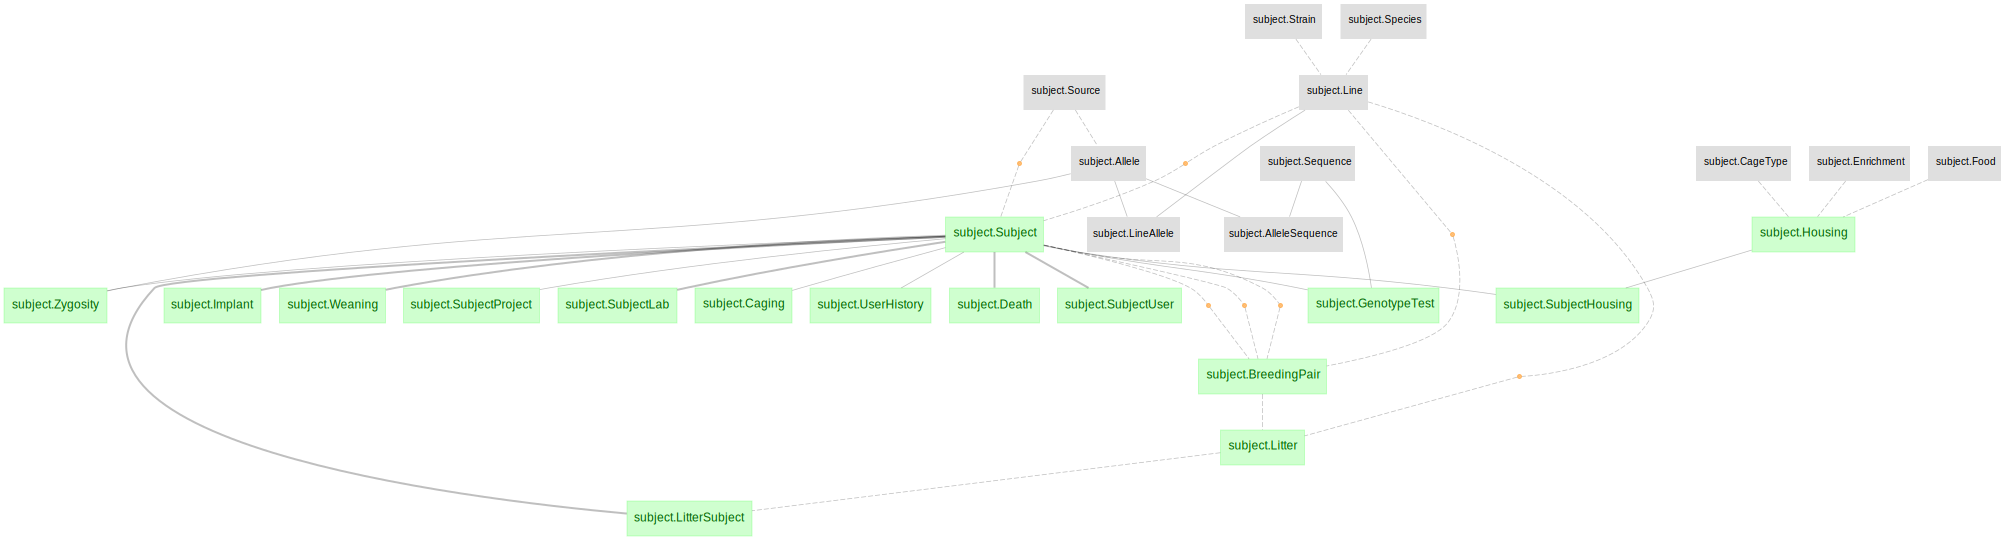

In [ ]:
# what is inside the table?

dj.Diagram(subject)

In [ ]:
# list of all sub-tables information 
dir(subject)

['Allele',
 'AlleleSequence',
 'BreedingPair',
 'CageType',
 'Caging',
 'Death',
 'Enrichment',
 'Food',
 'GenotypeTest',
 'Housing',
 'Implant',
 'Line',
 'LineAllele',
 'Litter',
 'LitterSubject',
 'Sequence',
 'Source',
 'Species',
 'Strain',
 'Subject',
 'SubjectHousing',
 'SubjectLab',
 'SubjectProject',
 'SubjectUser',
 'UserHistory',
 'Weaning',
 'Zygosity',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'schema']

In [ ]:
subject.Enrichment.describe()
subject.Enrichment()

enrichment_name      : varchar(255)                 
---
enrichment_uuid      : uuid                         
enrichment_description="" : varchar(255)                 
enrichment_ts=CURRENT_TIMESTAMP : timestamp                    



enrichment_name,enrichment_uuid,enrichment_description,enrichment_ts
Cardboard tunnel,d06c1f89-46b4-4dd9-8c0e-8ca1782095a5,,2020-04-02 04:28:31
Geometric object <5cm,51fd5a81-d08c-4dae-9075-1b66d9996725,,2020-04-02 04:28:31
House,0dc9ef0b-2f4b-40a6-a2b0-59f1990fa8fc,,2020-04-02 04:28:31
House_nest_wheel,52b1cfd3-de24-4b9e-9d4f-06cf5db72ac2,,2020-04-02 04:28:31
House_Nest_Wheel_CardboardTunnel,18dacd1b-e4d5-4967-999c-4032514331f7,All: House Nest Wheel CardboardTunnel,2020-04-02 04:28:31
Nesting,3cc8b8c8-634b-4811-984f-65989846e910,,2020-04-02 04:28:31
Wheel,535c8de9-feb0-44b8-871e-2a4e0866d3c5,,2020-04-02 04:28:31


In [ ]:
# For each item mentioned in the visual graph, we get the metadata in this way

#table.item.describe() 
subject.Death.describe()

-> subject.Subject
---
death_date           : date                         # death date
death_ts=CURRENT_TIMESTAMP : timestamp                    



'-> subject.Subject\n---\ndeath_date           : date                         # death date\ndeath_ts=CURRENT_TIMESTAMP : timestamp                    \n'

In [ ]:
# we can see the subcontent of the table with

subject.Death() # BEWARE for some item it can be empty e.g. Implant

subject_uuid,death_date death date,death_ts
00778394-c956-408d-8a6c-ca3b05a611d5,2020-03-09,2021-10-06 23:25:34
019a22c1-b944-4494-9e38-0e45ae6697bf,2019-12-17,2021-10-06 23:25:34
01be78e7-8741-4b40-bd64-79ed745431b5,2020-01-30,2021-10-06 23:25:34
02120449-9b19-4276-a434-513886c2fb19,2019-11-14,2021-10-06 23:25:34
030f3e05-9db0-46ba-a6ce-4274ff09b39e,2020-05-05,2020-09-24 00:09:26
034fd43f-ee35-450b-99ef-25475ce25fdc,2019-03-13,2020-01-13 23:41:03
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-29,2020-01-13 23:41:03
0812d02d-d62b-416d-8b66-7956db34ee32,2020-07-31,2021-10-06 23:25:35
082fa374-a10c-4c47-9c50-1c23e7490e30,2020-08-01,2020-09-24 00:09:26
088b6898-0a86-435e-b91f-eab829a846f6,2019-11-21,2021-10-06 23:25:35


### **FIRST QUESTION**


1.   Find fully trained mouse

2.   Find their related experiment

3.   Find the stimulus features

4.    Fit a logistic regression


In [ ]:
# check one mouse. How does its training status change?


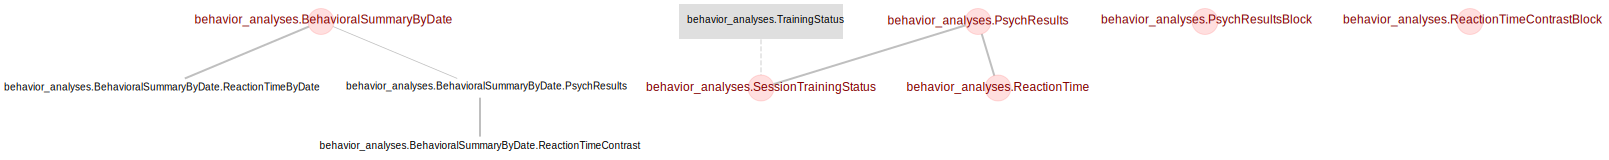

In [ ]:
dj.Diagram(behavior_analyses)

In [ ]:
behavior_analyses.SessionTrainingStatus()

subject_uuid,session_start_time start time,training_status,good_enough_for_brainwide_map
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,in_training,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-12 09:21:03,in_training,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-13 10:28:45,in_training,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-14 09:37:17,in_training,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-14 11:35:16,in_training,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-15 10:29:21,in_training,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-16 17:00:11,in_training,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-19 09:12:02,in_training,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-20 12:06:48,in_training,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-21 11:21:03,in_training,None


In [ ]:
behavior_analyses.TrainingStatus()

training_status
in_training
ready4delay
ready4ephysrig
ready4recording
trained_1a
trained_1b
unbiasable
untrainable


In [ ]:
our_guy = subject.Subject & 'subject_nickname="ZM_1092"'
our_guy

subject_uuid,subject_nickname nickname,sex sex,subject_birth_date birth date,ear_mark ear mark,subject_line name,subject_strain,subject_source name of source,protocol_number protocol number,subject_description,subject_ts
034fd43f-ee35-450b-99ef-25475ce25fdc,ZM_1092,M,2018-10-23,RLF,C57BL/6J,None,Jax,3,None,2020-01-13 23:39:02


In [ ]:
our_guy * behavior_analyses.SessionTrainingStatus


subject_uuid,session_start_time start time,subject_nickname nickname,sex sex,subject_birth_date birth date,ear_mark ear mark,subject_line name,subject_strain,subject_source name of source,protocol_number protocol number,subject_description,subject_ts,training_status,good_enough_for_brainwide_map
034fd43f-ee35-450b-99ef-25475ce25fdc,2019-01-23 13:22:12,ZM_1092,M,2018-10-23,RLF,C57BL/6J,None,Jax,3,None,2020-01-13 23:39:02,in_training,0
034fd43f-ee35-450b-99ef-25475ce25fdc,2019-01-24 16:40:45,ZM_1092,M,2018-10-23,RLF,C57BL/6J,None,Jax,3,None,2020-01-13 23:39:02,in_training,0
034fd43f-ee35-450b-99ef-25475ce25fdc,2019-01-25 14:23:53,ZM_1092,M,2018-10-23,RLF,C57BL/6J,None,Jax,3,None,2020-01-13 23:39:02,in_training,None
034fd43f-ee35-450b-99ef-25475ce25fdc,2019-01-28 14:47:48,ZM_1092,M,2018-10-23,RLF,C57BL/6J,None,Jax,3,None,2020-01-13 23:39:02,in_training,None
034fd43f-ee35-450b-99ef-25475ce25fdc,2019-01-29 15:51:31,ZM_1092,M,2018-10-23,RLF,C57BL/6J,None,Jax,3,None,2020-01-13 23:39:02,in_training,None
034fd43f-ee35-450b-99ef-25475ce25fdc,2019-01-30 14:54:20,ZM_1092,M,2018-10-23,RLF,C57BL/6J,None,Jax,3,None,2020-01-13 23:39:02,in_training,None
034fd43f-ee35-450b-99ef-25475ce25fdc,2019-01-31 15:07:10,ZM_1092,M,2018-10-23,RLF,C57BL/6J,None,Jax,3,None,2020-01-13 23:39:02,in_training,None
034fd43f-ee35-450b-99ef-25475ce25fdc,2019-02-01 14:16:08,ZM_1092,M,2018-10-23,RLF,C57BL/6J,None,Jax,3,None,2020-01-13 23:39:02,in_training,None
034fd43f-ee35-450b-99ef-25475ce25fdc,2019-02-04 15:01:38,ZM_1092,M,2018-10-23,RLF,C57BL/6J,None,Jax,3,None,2020-01-13 23:39:02,trained_1a,None
034fd43f-ee35-450b-99ef-25475ce25fdc,2019-02-05 13:45:57,ZM_1092,M,2018-10-23,RLF,C57BL/6J,None,Jax,3,None,2020-01-13 23:39:02,trained_1b,None


In [ ]:
import pandas as pd

In [ ]:
untrainables = pd.DataFrame(subject.Subject * behavior_analyses.SessionTrainingStatus & 'training_status="untrainable"')

In [ ]:
untrainables_uniques = untrainables['subject_nickname'].value_counts()
len(untrainables_uniques)

26

# exploring stimulus features


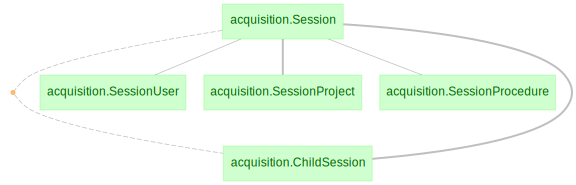

In [ ]:
dj.Diagram(acquisition)

In [ ]:
acquisition.SessionProcedure.describe()

# Behavior training/tasks
#  Head bolt clamp to a fixation bar (head bolt already in place and fully healed) - Training and performance of psychophysical visual tasks via the use of rewards

-> acquisition.Session
-> action.ProcedureType
---
sessionprocedure_ts=CURRENT_TIMESTAMP : timestamp                    



'-> acquisition.Session\n-> action.ProcedureType\n---\nsessionprocedure_ts=CURRENT_TIMESTAMP : timestamp                    \n'

In [ ]:
acquisition.SessionProject()

subject_uuid,session_start_time start time,session_project,sessionproject_ts
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,ibl_neuropixel_brainwide_01,2020-01-17 00:45:55
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-12 09:21:03,ibl_neuropixel_brainwide_01,2020-01-17 00:45:13
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-13 10:28:45,ibl_neuropixel_brainwide_01,2020-01-17 00:45:34
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-14 09:37:17,ibl_neuropixel_brainwide_01,2020-01-17 00:41:01
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-14 11:35:16,ibl_neuropixel_brainwide_01,2020-01-17 00:43:07
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-15 10:29:21,ibl_neuropixel_brainwide_01,2020-01-17 00:42:46
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-16 17:00:11,ibl_neuropixel_brainwide_01,2020-01-17 00:44:31
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-19 09:12:02,ibl_neuropixel_brainwide_01,2020-01-17 00:44:10
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-20 12:06:48,ibl_neuropixel_brainwide_01,2020-01-17 00:42:25
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-21 11:21:03,ibl_neuropixel_brainwide_01,2020-01-17 00:41:22


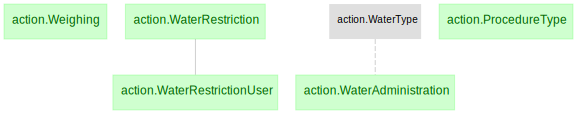

In [ ]:
dj.Diagram(action)

In [ ]:
action.WaterAdministration()

subject_uuid,administration_time date time,wateradmin_uuid,water_administered water administered,adlib,watertype_name,administration_user username,wateradministration_ts
00778394-c956-408d-8a6c-ca3b05a611d5,2019-07-28 14:03:24,67c73760-928f-4069-85ff-112c10275140,3.0,0,Water,None,2020-09-18 15:04:14
00778394-c956-408d-8a6c-ca3b05a611d5,2019-07-29 17:53:52,f25f6e05-00aa-4085-bcc8-d1e737eb30b7,1.0,0,Water 10% Sucrose,None,2020-09-18 15:34:38
00778394-c956-408d-8a6c-ca3b05a611d5,2019-07-30 17:20:47,6799a1e4-ab83-42e8-9e13-bb19878beb9f,1.0,0,Water 10% Sucrose,None,2020-09-18 15:04:12
00778394-c956-408d-8a6c-ca3b05a611d5,2019-07-31 12:18:21,4ed30960-bd37-41f1-add0-d3b75d9a5436,1.0,0,Water,None,2020-09-18 14:59:00
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-01 09:14:11,77e56179-9c76-45b4-ace3-c85bd5128e34,0.9,0,Water,None,2020-09-18 15:07:57
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-02 13:36:06,47a311d1-81bc-4c34-a759-c16e7a158c79,2.0,0,Water,None,2020-09-18 14:57:27
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-03 13:36:07,41560802-e216-47e4-a3e2-ce9fc8fbbf96,1.5,0,Water,None,2020-09-18 14:56:10
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-04 13:36:07,d3eb0f69-465e-4d35-ad71-bce2507f90c8,1.5,0,Water,None,2020-09-18 15:28:04
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-05 12:18:52,fa6c8b4b-4226-4e2e-8dcb-c066b9b384c2,1.3,0,Water,None,2020-09-18 15:36:24
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-06 13:25:31,d6e46807-cb37-44b0-84e0-07cd11a60689,0.75,0,Water,None,2020-09-18 15:28:46


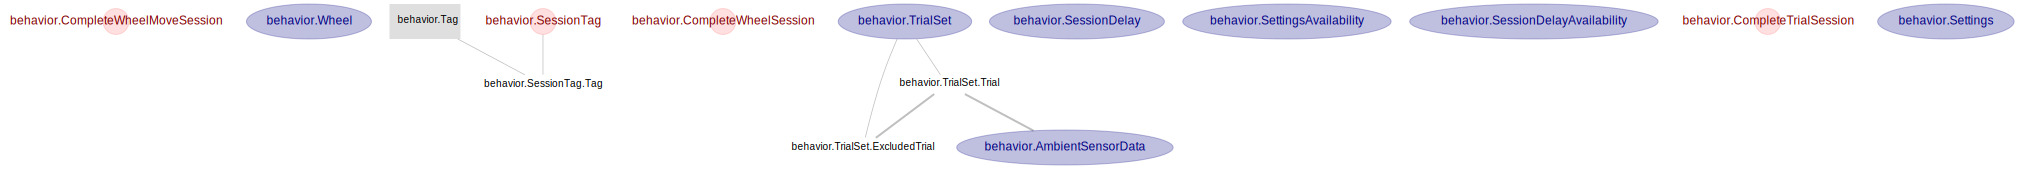

In [ ]:
dj.Diagram(behavior)

In [ ]:
behavior.TrialSet.Trial()

subject_uuid,session_start_time start time,trial_id trial identification number,trial_start_time beginning of quiescent period time (seconds),trial_end_time end of iti (seconds),"trial_response_time Time of ""response"" in choiceworld (seconds). This is when one of the three possible choices is registered in software, will not be the same as when the mouse's movement to generate that response begins.",trial_response_choice which choice was made in choiceworld,trial_stim_on_time Time of stimulus in choiceworld (seconds),trial_stim_contrast_left contrast of the stimulus on the left,trial_stim_contrast_right contrast of the stimulus on the right,trial_feedback_time Time of feedback delivery (reward or not) in choiceworld,"trial_feedback_type whether feedback is positive or negative in choiceworld (-1 for negative, +1 for positive)","trial_rep_num the repetition number of the trial, i.e. how many trials have been repeated on this side (counting from 1)",trial_go_cue_time,trial_go_cue_trigger_time,trial_stim_prob_left probability of the stimulus being present on left,trial_reward_volume reward volume of each trial,trial_iti_duration inter-trial interval,trial_included whether the trial should be included
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,1,0.0,6.410003,3.91,CW,1.5667,0.0,1.0,nan,-1,None,nan,1.5668,0.5,nan,nan,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,2,6.857100000000001,16.580802,14.0808,CCW,7.783600000000002,1.0,0.0,nan,-1,None,nan,7.7837,0.9,nan,nan,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,3,16.9776,38.342403000000004,35.8424,CCW,17.633,1.0,0.0,nan,-1,None,nan,17.6331,0.9,nan,nan,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,4,38.813500000000005,45.814603000000005,43.3146,CCW,41.33200000000001,1.0,0.0,nan,-1,None,nan,41.3321,0.9,nan,nan,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,5,46.2064,56.244803000000005,54.7449,CCW,46.91629999999999,0.0,1.0,54.7449,1,None,nan,46.9164,0.9,nan,nan,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,6,56.6314,67.092002,64.592,CCW,57.415800000000004,1.0,0.0,nan,-1,None,nan,57.4159,0.5,nan,nan,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,7,67.4791,81.22210199999999,78.7221,CCW,68.06530000000001,1.0,0.0,nan,-1,None,nan,68.0654,0.9,nan,nan,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,8,81.6323,104.89850299999999,103.3986,CCW,82.899,0.0,1.0,103.3986,1,None,nan,82.8991,0.9,nan,nan,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,9,105.37299999999999,109.928902,107.42889999999998,CCW,106.06549999999999,0.5,0.0,nan,-1,None,nan,106.066,0.5,nan,nan,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,10,110.2822,116.328402,113.8284,CCW,110.9315,0.5,0.0,nan,-1,None,nan,110.932,0.9,nan,nan,None
